**Model for the Electro-mechanical Behavior of Elastic Transistors**

(add paper ref)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pylab
from pylab import cm

mpl.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [2]:
# Set device parameters
# A typical mobility for TFTs is 1E-4 m**2/Vs
# A typical gate capacitance for TFTs is 5E-5 F/m**2

# Set the device type (options: TFT, EDLT, or OECT)
d_type = 'TFT'

# Set the inverter layout (options: parallel or perpendicular)
layout = 'perpendicular'

# n-TYPE device parameters
mu_n = 1E-4 # mobility, m**2/Vs
C_G_n = 5E-5 # gate capacitance, F/m**2 for TFT and EFLT; for OECT this is volumetric capacitance, F/m**3
W_n = 1 # channel width
L_n = 1 # channel length
d_n = 1E-7 # thickness of the semiconducting layer; only needs to be defined for OECTs

# p-TYPE device parameters
mu_p = 1E-4 # mobility, m**2/Vs
C_G_p = 5E-5 # gate capacitance, F/m**2 for TFT and EFLT; for OECT this is volumetric capacitance, F/m**3
W_p = 1 # channel width
L_p = 1 # channel length
d_p = 1E-7 # thickness of the semiconducting layer; only needs to be defined for OECTs

In [3]:
# Set the threshold voltages, supply voltage, and voltage scan resolution
# A typical value for threshold voltage is +/- 10 V (negative voltage for the p-type by convention)
# A typical value for supply voltage is 40 V

V_T_n = 10; # n-type threshold voltage, V
V_T_p = -10; # p-type threshold voltage, V
V_DD = 40; # supply voltage, V
V_resolution = 100; # number of datapoints for the voltage transfer curve

In [4]:
# Set the deformation range (extension ratio, er)
# Note: the deformation range must include the perfectly undeformed state (er=1)

# Set the axis for uniaxial deformation (options: "L" or "W")
# If modeling an inverter with a perpendicular layout, define the n-type deformation axis here
deformation_axis = 'W'

er = np.array([0.5, 0.75, 1, 1.5, 2])
#er = np.linspace(0.5,2,100)

er_1_idx = (np.abs(er - 1)).argmin()

In [5]:
# Define and calculate relevant parameters

# Define voltage parameters
V_in = np.linspace(0,V_DD,V_resolution)
V_G_n = V_in
V_G_p = V_in-V_DD
V_out = np.linspace(0,V_DD,V_resolution)
V_SD_n = V_out
V_SD_p = V_out-V_DD
V_sat_n_idx = V_resolution-1
V_sat_p_idx = V_resolution-1

In [6]:
# Define the scaling of device parameters with deformation depending on device type, deformation axis, and inverter layout

if d_type=='TFT':
    beta_n = (W_n/L_n)*mu_n*C_G_n;
    beta_p = (W_p/L_p)*mu_p*C_G_p;
    V_T_n_er = V_T_n*(er**(-1/2))
    V_T_p_er = V_T_p*(er**(-1/2))
    C_G_n_er = C_G_n*(er**(1/2))
    C_G_p_er = C_G_p*(er**(1/2))
    if deformation_axis=='L':
        if layout=='parallel':
            geo_n_er = (W_n/L_n)*(er**(-3/2))
            geo_p_er = (W_p/L_p)*(er**(-3/2))
        elif layout=='perpendicular':
            geo_n_er = (W_n/L_n)*(er**(-3/2))
            geo_p_er = (W_p/L_p)*(er**(3/2)) # p-type is being deformed along W
    elif deformation_axis=='W':
        if layout=='parallel':
            geo_n_er = (W_n/L_n)*(er**(3/2))
            geo_p_er = (W_p/L_p)*(er**(3/2))
        elif layout=='perpendicular':
            geo_n_er = (W_n/L_n)*(er**(3/2))
            geo_p_er = (W_p/L_p)*(er**(-3/2)) # p-type is being deformed along L
            
elif d_type=='EDLT':
    beta_n = (W_n/L_n)*mu_n*C_G_n;
    beta_p = (W_p/L_p)*mu_p*C_G_p;
    V_T_n_er = V_T_n
    V_T_p_er = V_T_p
    C_G_n_er = C_G_n
    C_G_p_er = C_G_p
    if deformation_axis=='L':
        if layout=='parallel':
            geo_n_er = (W_n/L_n)*(er**(-3/2))
            geo_p_er = (W_p/L_p)*(er**(-3/2))
        elif layout=='perpendicular':
            geo_n_er = (W_n/L_n)*(er**(-3/2))
            geo_p_er = (W_p/L_p)*(er**(3/2)) # p-type is being deformed along W
    elif deformation_axis=='W':
        if layout=='parallel':
            geo_n_er = (W_n/L_n)*(er**(3/2))
            geo_p_er = (W_p/L_p)*(er**(3/2))
        elif layout=='perpendicular':
            geo_n_er = (W_n/L_n)*(er**(3/2))
            geo_p_er = (W_p/L_p)*(er**(-3/2)) # p-type is being deformed along L
        
elif d_type=='OECT':
    beta_n = (W_n/L_n)*d_n*mu_n*C_G_n;
    beta_p = (W_p/L_p)*d_p*mu_p*C_G_p;
    V_T_n_er = V_T_n
    V_T_p_er = V_T_p
    C_G_n_er = C_G_n
    C_G_p_er = C_G_p
    if deformation_axis=='L':
        if layout=='parallel':
            geo_n_er = (W_n/L_n)*d_n*(er**(-2))
            geo_p_er = (W_p/L_p)*d_p*(er**(-2))
        elif layout=='perpendicular':
            geo_n_er = (W_n/L_n)*d_n*(er**(-2))
            geo_p_er = (W_p/L_p)*d_p*er # p-type is being deformed along W
    elif deformation_axis=='W':
        if layout=='parallel':
            geo_n_er = (W_n/L_n)*d_n*er
            geo_p_er = (W_p/L_p)*d_p*er
        elif layout=='perpendicular':
            geo_n_er = (W_n/L_n)*d_n*er
            geo_p_er = (W_p/L_p)*d_p*(er**(-2)) # p-type is being deformed along L

In [7]:
# Function to calculate the source-drain current vs. deformation

def I_SD_calc(er, V_G, V_SD, V_T_er, C_G_er, geo_er, mu):
    I_SD = np.zeros((np.size(V_SD,0), np.size(V_G,0), np.size(er,0)))
    for i in range(np.size(er,0)):
        for j in range(np.size(V_G,0)):
            for k in range(np.size(V_SD)):
                if abs(V_G[j])<abs(V_T_er[i]):
                    I_SD[k,j,i]=0
                elif abs(V_SD[k])<abs(V_G[j]-V_T_er[i]): # linear regime
                    I_SD[k,j,i]=geo_er[i]*C_G_er[i]*mu*(((V_G[j]-V_T_er[i])*V_SD[k])-((V_SD[k]**2)/2))
                elif abs(V_SD[k])>=abs(V_G[j]-V_T_er[i]): # saturation regime
                    I_SD[k,j,i]=geo_er[i]*C_G_er[i]*mu*(((V_G[j]-V_T_er[i])**2)/2)
    return I_SD

In [8]:
# Calculate the source-drain current vs. deformation for the p-type and n-type TFTs

# I_SD for the n-type transistor
I_SD_n = I_SD_calc(er, V_G_n, V_SD_n, V_T_n_er, C_G_n_er, geo_n_er, mu_n)

# I_SD for the p-type transistor
I_SD_p = I_SD_calc(er, V_G_p, V_SD_p, V_T_p_er, C_G_p_er, geo_p_er, mu_p)

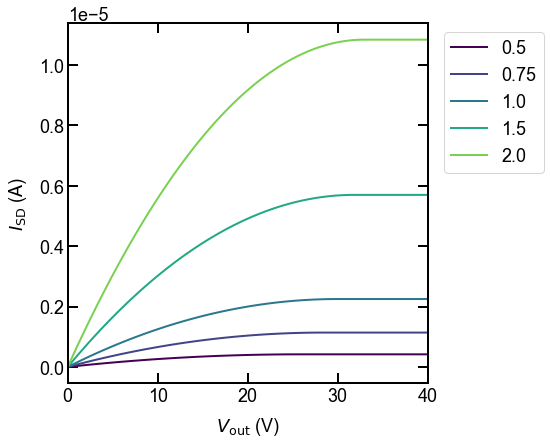

In [10]:
# Plot a series of load curves vs. deformation for the n-type transistor with V_in = 40 V

er_plot = np.array([0.5, 0.75, 1, 1.5, 2])

idx_er = np.zeros((np.size(er_plot)))

for i in range((np.size(er_plot))):
    idx_er[i] = (np.abs(er - er_plot[i])).argmin()

fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

ax.set_xlim(0, np.max(V_out))
#ax.set_ylim(0, 1.05*np.max(I_SD_n[:,:,idx_er]))

ax.set_xlabel('$V_\mathrm{out}$ (V)', labelpad=10)
ax.set_ylabel('$I_\mathrm{SD}$ (A)', labelpad=10)

cm = pylab.get_cmap('viridis')

for i in range((np.size(er_plot,0))):
    ax.plot(V_out, I_SD_n[:,int(np.size(I_SD_n,1)-1),int(idx_er[i])], linewidth=2, color=cm(1.*i/np.size(er_plot)), label=(str(er_plot[i])))
    
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')

plt.show()

#plt.savefig('Final_Plot.png', dpi=300, transparent=False, bbox_inches='tight')

In [13]:
# Function to calculate the relative source-drain current (I_SD'/I_SD(er=1)) in the saturation regime

def I_SD_rel_calc(I_SD, er_idx, V_in, V_out_sat):
    I_SD_rel = np.zeros((np.size(er,0)))
    for i in range(np.size(er,0)):
        I_SD_rel[i]=I_SD[V_out_sat,V_in,i]/I_SD[V_out_sat,V_in,er_idx]
    return I_SD_rel

In [14]:
# Calculate the relative source-drain current (I_SD'/I_SD(er=1)) in the saturation regime for the p-type and n-type TFTs

# Relative I_SD for the n-type transistor
I_SD_rel_n = I_SD_rel_calc(I_SD_n,er_1_idx,int(np.size(I_SD_n,0)-1),int(np.size(I_SD_n,0)-1))

# Relative I_SD for the p-type transistor
I_SD_rel_p = I_SD_rel_calc(I_SD_p,er_1_idx,0,0)

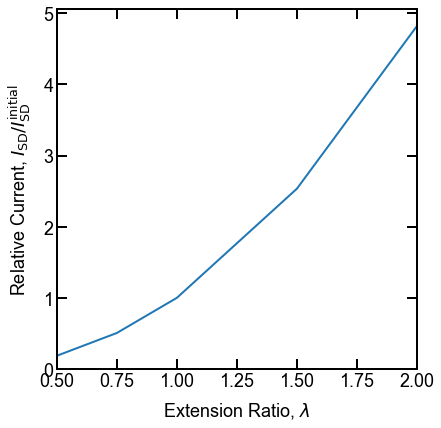

In [15]:
# Plot relative source-drain current in the saturation regime vs. extension ratio

fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

ax.set_xlim(np.min(er), np.max(er))
ax.set_ylim(0, 1.05*np.max(I_SD_rel_n))

ax.set_xlabel('Extension Ratio, $\lambda$', labelpad=10)
ax.set_ylabel('Relative Current, $I_\mathrm{SD}/I_\mathrm{SD}^\mathrm{initial}$', labelpad=10)

ax.plot(er, I_SD_rel_n, linewidth=2)

plt.show()

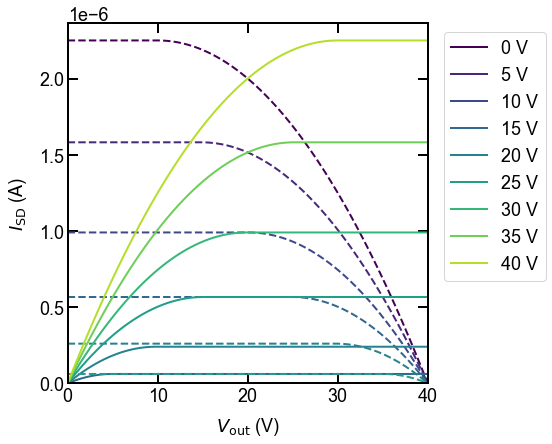

In [16]:
# Plot a series of load curves

# Set deformation
er_LC_plot = 1

# Set list of V_in's
V_in_LC_plot = np.array([0, 5, 10, 15, 20, 25, 30, 35, 40])

idx_er = (np.abs(er - er_LC_plot)).argmin()
idx_n = np.zeros((np.size(V_in_LC_plot)))
idx_p = np.zeros((np.size(V_in_LC_plot)))

for i in range((np.size(V_in_LC_plot))):
    idx_n[i] = (np.abs(V_G_n - V_in_LC_plot[i])).argmin()

for i in range((np.size(V_in_LC_plot))):
    idx_p[i] = (np.abs(V_G_p - (V_in_LC_plot[i]-V_DD))).argmin()
    
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

ax.set_xlim(0, V_DD)
ax.set_ylim(0, 1.05*np.max(I_SD_n[:,:,idx_er]))

ax.set_xlabel('$V_\mathrm{out}$ (V)', labelpad=10)
ax.set_ylabel('$I_\mathrm{SD}$ (A)', labelpad=10)

cm = pylab.get_cmap('viridis')

for i in range((np.size(V_in_LC_plot))):
    ax.plot(V_out, I_SD_n[:,int(idx_n[i]),idx_er], linewidth=2, color=cm(1.*i/np.size(V_in_LC_plot)), label=(str(V_in_LC_plot[i])+' V'))
    ax.plot(V_out, I_SD_p[:,int(idx_p[i]),idx_er], linewidth=2, color=cm(1.*i/np.size(V_in_LC_plot)), linestyle='--')

plt.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')

plt.show()

#plt.savefig('Final_Plot.png', dpi=300, transparent=False, bbox_inches='tight')

In [17]:
# Build the voltage transfer curve (VTC) by finding where the n- and p-type load curves cross
# The accuracy of this calculation depends on your voltage scan resolution, V_resolution

V_out_cross = np.zeros((np.size(V_in,0),np.size(er,0)))
for i in range(np.size(er,0)):
    for j in range (np.size(V_in,0)):
        for k in range (np.size(V_out,0)):
            if I_SD_n[k,j,i]>=I_SD_p[k,j,i]:
                V_out_cross[j,i]=V_out[k]
                break

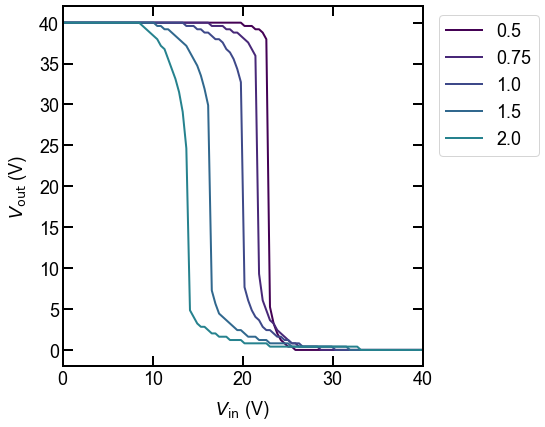

In [18]:
# Plot the voltage transfer curve of the inverter vs. deformation

er_plot = np.array([0.5, 0.75, 1, 1.5, 2])

idx_er = np.zeros((np.size(er_plot)))

for i in range((np.size(er_plot))):
    idx_er[i] = (np.abs(er - er_plot[i])).argmin()

fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

ax.set_xlim(np.min(V_in), np.max(V_in))
ax.set_ylim((np.min(V_out_cross)-0.05*np.max(V_out_cross)), 1.05*np.max(V_out_cross))

ax.set_xlabel('$V_\mathrm{in}$ (V)', labelpad=10)
ax.set_ylabel('$V_\mathrm{out}$ (V)', labelpad=10)

cm = pylab.get_cmap('viridis')

for i in range((np.size(er_plot,0))):
    ax.plot(V_in, V_out_cross[:,int(idx_er[i])], linewidth=2, color=cm(1.*i/np.size(V_in_LC_plot)), label=(str(er_plot[i])))
    
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')

plt.show()

In [23]:
# Generate flipped and rotated VTC for creating eye plot

eye_x = np.zeros((np.size(V_out_cross,0),np.size(er,0)))
eye_y = np.zeros((np.size(V_out_cross,0),np.size(er,0)))

for i in range(np.size(er,0)):
    eye_x[:,i] = -V_out_cross[:,i]+V_DD
    eye_y[:,i] = np.flip(V_in)

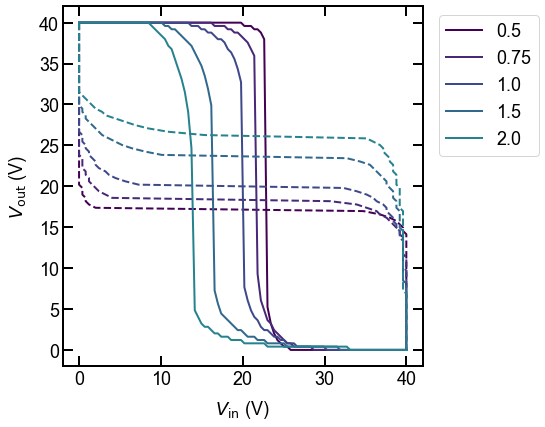

In [26]:
# Plot the voltage transfer curve of the inverter vs. deformation, with transformed data to highlight the eye of operation

er_plot = np.array([0.5, 0.75, 1, 1.5, 2])

idx_er = np.zeros((np.size(er_plot)))

for i in range((np.size(er_plot))):
    idx_er[i] = (np.abs(er - er_plot[i])).argmin()

fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0, 0, 1, 1])
ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right='on')
ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right='on')

ax.set_xlim((np.min(V_in)-0.05*np.max(V_in)), 1.05*np.max(V_in))
ax.set_ylim((np.min(V_out_cross)-0.05*np.max(V_out_cross)), 1.05*np.max(V_out_cross))

ax.set_xlabel('$V_\mathrm{in}$ (V)', labelpad=10)
ax.set_ylabel('$V_\mathrm{out}$ (V)', labelpad=10)

cm = pylab.get_cmap('viridis')

for i in range((np.size(er_plot,0))):
    ax.plot(V_in, V_out_cross[:,int(idx_er[i])], linewidth=2, color=cm(1.*i/np.size(V_in_LC_plot)), label=(str(er_plot[i])))
    ax.plot(eye_x[:,int(idx_er[i])], eye_y[:,int(idx_er[i])], linewidth=2, color=cm(1.*i/np.size(V_in_LC_plot)),linestyle='--')
    
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='upper left')

plt.show()